# สำคัญ: ถ้าคุณเปิดไฟล์นี้จากลิงค์ในระบบเรียน
กรุณากด File > Save a Copy in Drive เพื่อก็อปปี้ไฟล์นี้ไปก่อน

และหากพบ Error ในโค้ด มีคำแนะนำดังนี้
1. ลองอ่าน Error ให้ละเอียดก่อน โดยส่วนใหญ่จะทำให้เข้าใจปัญหาได้
2. ถ้าหาคำตอบไม่เจอ ลองเปรียบเทียบกับโค้ดในไฟล์เฉลย
3. ถ้ายังหาคำตอบไม่เจอ หรือมีคำถามข้อสงสัยตรงไหน สอบถามทีมสอน R2DE3 ได้เลยผ่านช่องทางต่าง ๆ ยินดีช่วยเหลือคร้าบ ^^

---

เริ่มกันเลยดีกว่า

# ยินดีต้อนรับสู่ Workshop 2: Data Cleansing with Apache Spark

บริษัท Chic & Cozy มีข้อมูลจำนวนมาก Data Engineer จึงต้องนำข้อมูลมาทำความสะอาดเพื่อให้พร้อมใช้ ก่อนที่จะนำข้อมูลไปใช้งานต่อได้

## เทคโนโลยีที่เราจะโฟกัส:
- Apache Spark

## ภาพรวม Workshop นี้

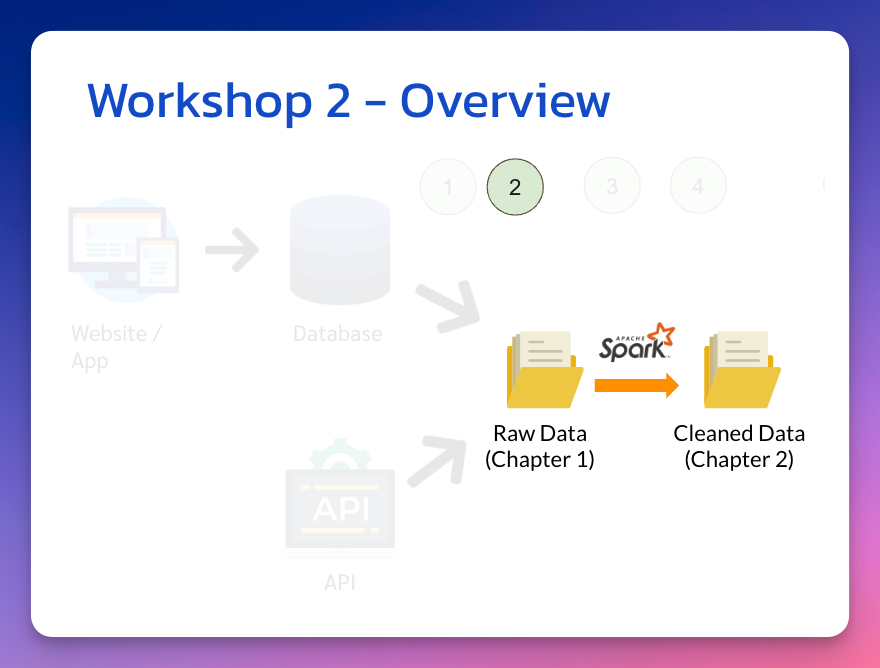

## ลิงค์ดีมีประโยชน์

### 1. หน้าเว็บไซต์รวมคำสั่งทั้งหมดของ PySpark

หน้าเว็บไซต์นี้อัพเดทข้อมูลโดยทีมงาน Apache Spark พร้อมวิธีใช้ และคำอธิบายค่าต่าง ๆ ที่คำสั่งนั้นสามารถรับได้ สามารถค้นหาคำสั่งที่ต้องการได้ด้วย

https://spark.apache.org/docs/latest/api/python/reference/index.html

### 2. [ภาษาอังกฤษ] Spark Cheatsheet by DataCamp

รวมคำสั่ง Spark

**RDD:**
https://www.datacamp.com/community/blog/pyspark-cheat-sheet-python

**DataFrame:**
https://www.datacamp.com/community/blog/pyspark-sql-cheat-sheet

### 3. [ภาษาไทย] Spark Cheatsheet by DataTH

รวมคำสั่ง Spark พร้อมตัวอย่างโค้ด และคำอธิบายภาษาไทย

https://blog.datath.com/cheatsheet-pyspark/

---

# มาเริ่ม Workshop 2 กันเลย

# Step 1) ติดตั้ง Spark และ PySpark

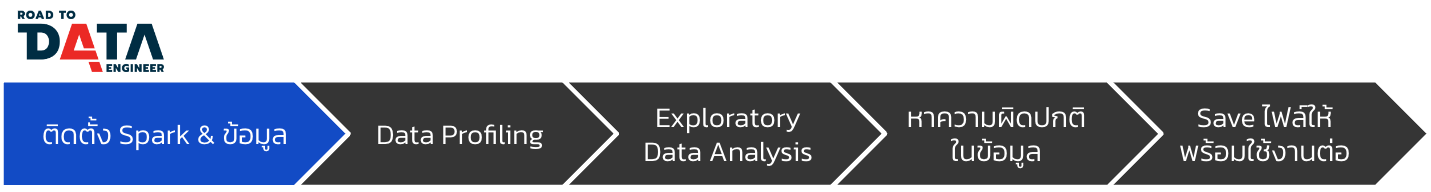

In [ ]:
!apt-get update                                                                          # อัพเดท Package ทั้งหมดใน VM ตัวนี้
!apt-get install openjdk-8-jdk-headless -qq > /dev/null                                  # ติดตั้ง Java Development Kit (จำเป็นสำหรับการติดตั้ง Spark)
!wget -q https://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz   # ติดตั้ง Spark 3.5.1
!tar xzvf spark-3.5.1-bin-hadoop3.tgz                                                    # Unzip ไฟล์ Spark 3.5.1
!pip install -q findspark                                                                # ติดตั้ง Package Python สำหรับเชื่อมต่อกับ Spark

# Set enviroment variable ให้ Python รู้จัก Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

# ติดตั้ง PySpark version 3.5.1 ลงใน Python
!pip install pyspark==3.5.1

In [ ]:
# Server ของ Google Colab มีกี่ Core
!cat /proc/cpuinfo

In [ ]:
# สร้าง Spark Session เพิ่อใช้งาน Spark
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
      .appName("Road to Data Engineer 3.0 App") \
    .getOrCreate()

In [ ]:
# ดูเวอร์ชั่น Python
import sys
sys.version_info

In [ ]:
# ดูเวอร์ชั่น Spark
spark.version

### อ่านข้อมูล

ดาวน์โหลดข้อมูลไฟล์ Parquet ที่ได้จากผลลัพธ์ของ Workshop 1 (+ มีแอบแก้ข้อมูลเล็กน้อย เพื่อให้ได้เรียนรู้การคลีนข้อมูลใน Workshop 2 นี้)

In [ ]:
!wget https://file.designil.com/f/6BamyF+ -O w2_input.parquet

In [ ]:
# สำคัญ: แทน ... ด้วยชื่อไฟล์ parquet ที่ดาวน์โหลดมา
dt = spark.read.parquet('...')

dt

In [ ]:
dt.show(10)

# Step 2) Data Profiling

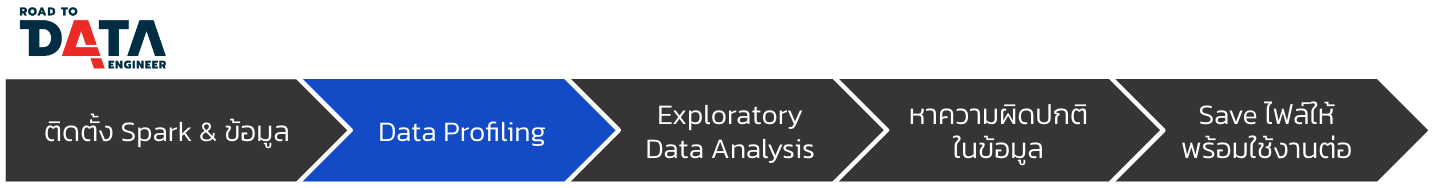

Data Profiling เป็นการทำความเข้าใจข้อมูลเบื้องต้น เพื่อที่เราจะได้รู้ว่าข้อมูลนี้มีคอลัมน์ไหนบ้าง ค่าโดยรวมเป็นอย่างไรบ้าง ฯลฯ เพื่อให้เราตัดสินใจได้ต่อว่าจะเช็คที่จุดไหนต่อไป

ตัวอย่าง: max, min, average, sum, มี missing value มั้ย ฯลฯ

In [ ]:
# ดูว่ามีคอลัมน์อะไรบ้าง
dt

> ข้อมูลนี้มี 11 คอลัมน์:

| Column Name        | Data Type                          |
|--------------------|------------------------------------|
| `transaction_id`   | string (ตัวหนังสือ)                |
| `date`             | string                             |
| `product_id`       | string                             |
| `price`            | double (ตัวเลขมีทศนิยม)         |
| `quantity`         | bigint (ตัวเลขจำนวนเต็ม)           |
| `customer_id`      | double                             |
| `product_name`     | string                             |
| `customer_country` | string                             |
| `customer_name`    | string                             |
| `total_amount`     | double                             |
| `thb_amount`       | double                             |


In [ ]:
# ดูข้อมูล
dt.show()

In [ ]:
# ดูข้อมูล 100 แถวแรก
dt.show(100)

In [ ]:
# ดูข้อมูล 100 แถวแรก แบบไม่มี ...
dt.show(100, truncate = False)

In [ ]:
# ดูประเภทข้อมูลแต่ละคอลัมน์
dt.dtypes

In [ ]:
# อีกคำสั่งในการดูข้อมูลแต่ละคอลัมน์ (Schema)
dt.printSchema()

nullable คือ ค่าสามารถเป็น null (ค่าว่างเปล่า) ได้





In [ ]:
# นับจำนวนแถวและ column
print((dt.count(), len(dt.columns)))

In [ ]:
# สรุปข้อมูลสถิติ
dt.describe().show()

In [ ]:
# อีกคำสั่งในการสรุปข้อมูลสถิติ
# Reference: https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.summary.html

dt.summary().show()

In [ ]:
# สรุปข้อมูลสถิติเฉพาะ column ที่ระบุ
dt.select("price").describe().show()

### Exercise 1

บอสอยากรู้ว่าคอลัมน์ไหนมี Missing Value บ้าง และแสดงข้อมูลแถวที่มี Missing Value ให้ดูหน่อย



In [ ]:
# หาว่าคอลัมน์ไหนมี Missing Values (คำใบ้: ใช้โค้ดคล้าย ๆ ข้างบน)
...

In [ ]:
# แสดงแถวข้อมูลที่มี Missing Value
# สำคัญ: แทนค่า aaa ด้วยชื่อคอลัมน์ที่มี Missing Value
dt.where( dt.aaa.isNull() ).show()

### Bonus 1: YData Profiling เครื่องมือทำ EDA ที่ทำให้ชีวิตสบายมาก

<img src="https://camo.githubusercontent.com/2a859e96cdec98998f2e5aa4c58bed85f2db22ceed2362486aa93ec596c7226b/68747470733a2f2f6173736574732e79646174612e61692f6f73732f79646174612d70726f66696c696e675f626c61636b2e706e67" height="200">

GitHub - https://github.com/ydataai/ydata-profiling

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(dt.toPandas(), title="Profiling Report")

In [ ]:
profile

# Step 3) EDA - Exploratory Data Analysis

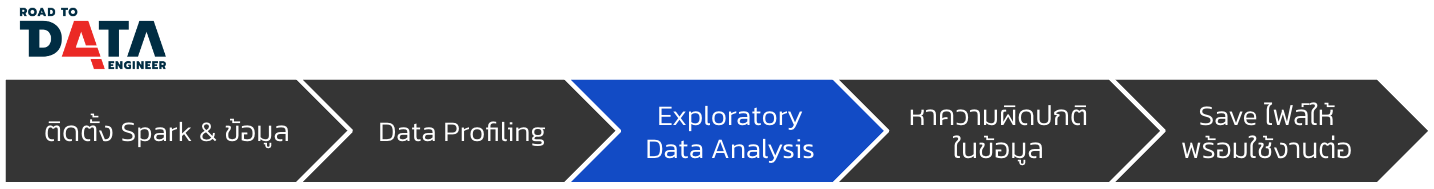

EDA = การใช้วิธี / เทคนิคต่าง ๆ เช่น
- เทคนิคทางสถิติ (Statistical techniques)
- การจัดกลุ่มข้อมูล (Data Aggregation)
- การแปลงข้อมูลเป็นกราฟฟิก (Data Visualization)

ฯลฯ

ในการวิเคราะห์หาคำตอบที่ต้องการจากข้อมูล

ใน Workshop นี้ เราจะมาลองทำ EDA แบบไม่มีกราฟฟิก (Non-Graphical) และแบบมีกราฟฟิก (Graphical)

## 1) Non-Graphical EDA

เราสามารถใช้คำสั่ง Spark ในการค้นหาข้อมูลที่ต้องการได้

In [ ]:
# ข้อมูลที่เป็นตัวเลข
dt.where(dt.price >= 100).show()

In [ ]:
# ข้อมูลที่เป็นตัวหนังสือ
dt.where(dt.customer_country == 'Australia').show()

### Exercise 2:
1. การซื้อทั้งหมดที่เกิดขึ้นในเดือนพฤษภาคม 2024 มีกี่แถว
2. การซื้อทั้งหมดที่เกิดขึ้นในเดือนมิถุนายน 2024 มีกี่แถว

In [ ]:
# Q1 (คำใบ้: ใช้คำสั่ง startswith("...") เพื่อเช็คได้ว่าตัวหนังสือเริ่มต้นด้วยคำที่เราต้องการหามั้ย)
...

In [ ]:
# Q2
...

## 2) Graphical EDA


Spark ไม่ได้ถูกพัฒนามาเพื่องาน plot ข้อมูล เพราะฉะนั้นเราจะใช้ `pandas` ร่วมกับ package `seaborn`, `matplotlib` ในการ plot ข้อมูลแทน

เราจะมารู้จักกับ
1. Boxplot
2. Histogram
3. Scatterplot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# แปลง Spark Dataframe เป็น Pandas Dataframe - ใช้เวลาประมาณ 11 วินาที
dt_pd = dt.toPandas()

In [ ]:
# ดูตัวอย่างข้อมูล
dt_pd.head()

In [ ]:
# Plot 1) Boxplot - แสดงการกระจายตัวของข้อมูลตัวเลข
sns.boxplot(x = dt_pd['price'])

ดูยากจัง o_o ลองดูพลอตอีกแบบกันเถอะ

In [ ]:
# Plot 2) Histogram - แสดงการกระจายตัวของข้อมูลตัวเลข
# bins = จำนวน bar ที่ต้องการแสดง
sns.histplot(dt_pd['price'], bins=10)

In [ ]:
# เพิ่ม bin เพื่อแสดงข้อมูลละเอียดขึ้น
sns.histplot(dt_pd['price'], bins=100)

### Exercise 3:
พลอตข้างบนมองยากจัง เราจะซูมเข้าไปอ่านค่ายังไงดี?

In [ ]:
# ลองเขียนดู (คำใบ้: กำหนด range ราคาเพื่อซูม)
...

----

In [ ]:
# Plot 3) Scatterplot - แสดงความสัมพันธ์ระหว่าง 2 ตัวแปร
# เช่น ถ้าเราอยากรู้ว่า Quantity กับ Price สัมพันธ์กันแค่ไหน
sns.scatterplot(x=dt_pd.quantity, y=dt_pd.price)

### Bonus 2: สร้าง interactive chart ด้วย Plotly

In [ ]:
# Plotly - interactive chart (รันประมาณ 7 วินาที)
import plotly.express as px
fig = px.scatter(dt_pd, 'customer_id', 'price')
fig.show()

### Bonus 3: เครื่องมือช่วยสร้าง Data Visualization & EDA ข้อมูล ด้วย PyGWalker

![img](https://docs-us.oss-us-west-1.aliyuncs.com/img/pygwalker/frontpage-rendered.png)

GitHub - https://github.com/Kanaries/pygwalker

In [ ]:
!pip install pygwalker
import pygwalker as pyg

In [ ]:
pyg.walk(dt.toPandas())

# Step 4) Data Cleansing with PySpark

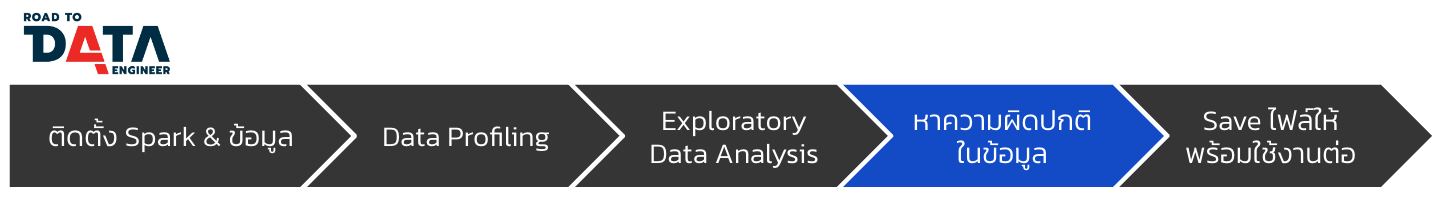

ในขั้นตอนนี้ เราจะมาหาปัญหา / ความผิดปกติในข้อมูล และทำความสะอาดกัน

ใน Workshop นี้จะพาไปเช็คความผิดปกติที่เจอบ่อย ๆ ในข้อมูล 5 แบบ
- Data Type
- Syntactical Anomalies
- Semantic Anomalies
- Missing Values
- Outliers

### Data Type

ปัญหาที่เจอบ่อยที่สุดแบบหนึ่งในข้อมูล คือ **Data Type ไม่ตรงกับที่เราต้องการ**

In [ ]:
# Show data
dt.show(truncate=False)

In [ ]:
# Show schema
dt.printSchema()

จะเห็นว่า `date` ถูกอ่านเป็นข้อมูลตัวหนังสือ (String) แต่เราอยากให้มันเป็นข้อมูลวันที่และเวลา (date time) จะทำยังไงดี?

ก่อนอื่น เราต้องมาดูก่อนว่าคอลัมน์ date ข้อมูลหน้าตาแบบไหน

In [ ]:
dt.select("date").show(10)

เราจะมาใช้ฟังก์ชั่น to_timestamp ซึ่งอยู่ใน pyspark.sql.functions กัน

Reference: https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.to_timestamp.html

Date Format: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html

In [ ]:
# แปลง string เป็น datetime
from pyspark.sql import functions as f

dt_clean = dt.withColumn("date",
                        f.to_timestamp(dt.date, 'yyyy-MM-dd')
                        )
dt_clean.show()

In [ ]:
# เกร็ดน่ารู้: ถ้าใช้ Date format มาตรฐานแล้ว ไม่ต้องกำหนด Date Format ตอนสั่ง to_timestamp ก็ได้
dt_clean = dt.withColumn("date",
                        f.to_timestamp(dt.date)
                        )
dt_clean.show()

In [ ]:
# เช็คจาก mix, max ของคอลัมน์ date ว่าข้อมูลมาครบมั้ย
dt_clean.select(
    f.min(dt_clean.date),
    f.max(dt_clean.date)
).show()

In [ ]:
dt_clean.printSchema()

## Bonus 4: ตัวอย่างการใช้ประโยชน์จากข้อมูล Datetime

In [ ]:
# นับยอด transaction ช่วงครึ่งเดือนแรก ของเดือนมกราคม 2024
dt_clean.where( (f.dayofmonth(dt_clean.date) <= 15) & ( f.month(dt_clean.date) == 1 ) & ( f.year(dt_clean.date) == 2024 ) ).count()

In [ ]:
# เกร็ดน่ารู้: บางครั้งเราไม่แปลง Data type แต่ Spark ฉลาด แปลง String -> Timestamp ให้อัตโนมัติเลย
dt.where( (f.dayofmonth(dt.date) <= 15) & ( f.month(dt.date) == 1 ) & ( f.year(dt.date) == 2024 ) ).count()

## Anomalies Check

ใช้ Spark ตามหาสิ่งที่ผิดปกติในข้อมูล

### ความผิดปกติ 1) Syntactical Anomalies
**Lexical errors** เช่น สะกดผิด

#### Exercise 4

หาชื่อประเทศที่สะกดผิด แล้วแก้ชื่อที่สะกดผิดให้ถูก

คุณเห็นชื่อประเทศที่สะกดผิดในคอลัมน์ Country มั้ย

In [ ]:
# ใน Data set ชุดนี้ มีข้อมูลจากกี่ประเทศ
# สำคัญ: แทนที่ ... ด้วยชื่อคอลัมน์ชื่อประเทศ
dt_clean.select("...").distinct().count()

In [ ]:
# สำคัญ: แทนที่ ... ด้วยชื่อคอลัมน์ชื่อประเทศ

# .sort() = ทำให้ข้อมูลเรียงตามตัวอักษร อ่านได้ง่ายขึ้น

# .show() = แสดงข้อมูล ถ้าไม่ระบุตัวเลข จะขึ้นมาแค่ 20 อัน
# สำคัญ:แทนที่ aaa ด้วยจำนวนประเทศ เพื่อดูรายชื่อประเทศทั้งหมด

dt_clean.select("...").distinct().sort("customer_country").show( aaa )

เจอชื่อประเทศแปลก ๆ มั้ย?

มาดูกันว่าประเทศที่ชื่อผิด มีข้อมูลหน้าตาเป็นอย่างไร

In [ ]:
# สำคัญ: แทนที่ ... ด้วยชื่อคอลัมน์ชื่อประเทศ
# สำคัญ: เปลี่ยน aaa เป็นชื่อประเทศที่คุณคิดว่าผิด

dt_clean.where(dt_clean['...'] == 'aaa').show()

ได้เวลาลองเปลี่ยนชื่อประเทศให้สะกดถูกต้อง

In [ ]:
# สำคัญ: แทนที่ ... ด้วยชื่อคอลัมน์ชื่อประเทศ
# สำคัญ: เปลี่ยน aaa เป็นชื่อประเทศที่คุณคิดว่าผิด และ bbb เป็นชื่อประเทศที่ถูกต้อง
from pyspark.sql.functions import when

dt_clean_country = dt_clean.withColumn("..._update", when(dt_clean['...'] == 'aaa', 'bbb').otherwise(dt_clean['...']))

ตรวจสอบข้อมูลที่แก้ไขแล้ว

In [ ]:
# สำคัญ: แทนที่ ... ด้วยชื่อคอลัมน์ชื่อประเทศ

dt_clean_country.select("..._update").distinct().sort("..._update").show(40)

In [ ]:
# ดูหน้าตาข้อมูลตอนนี้
dt_clean_country.show()

ลบคอลัมน์ประเทศอันเก่า แล้วแทนที่ด้วยคอลัมน์ประเทศอันใหม่

In [ ]:
# เอาคอลัมน์ ..._update ไปแทนที่คอลัมน์ ...
dt_clean_v2 = dt_clean_country.drop("...").withColumnRenamed('..._update', '...')

In [ ]:
# ดูหน้าตาข้อมูล (สุ่มเลือก Transaction_ID มา 1 อัน)
dt_clean_v2[ dt_clean_v2.transaction_id == '576923' ].show()

### ความผิดปกติ 2) Semantic Anomalies

**Integrity constraints**: ค่าอยู่นอกเหนือขอบเขตของค่าที่รับได้ เช่น product_id ยาวกว่าที่ควรจะเป็น

In [ ]:
# ดูว่าข้อมูล product_id ตอนนี้หน้าตาเป็นอย่างไร
dt_clean_v2.select("product_id").show(100)

In [ ]:
# นับจำนวน product_id ทั้งหมด
dt_clean_v2.select("product_id").count()

#### Exercise 5

ทีมบอกว่า ให้แทนค่า product_id ที่เกิน 5 ตัวอักษร ให้กลายเป็น 5 ตัวอักษรให้หมด

##### Solution
1. ดูว่า product_id ตรงตามรูปแบบที่เราต้องการทั้งหมดมั้ย

คำใบ้: ใช้เว็บไซต์ https://www.regex101.com เพื่อสร้าง Regular Expression ตามรูปแบบที่เราต้องการ

In [ ]:
# หาว่า product_id เป็นตัวหนังสือ 5 ตัวทั้งหมดมั้ย
# = ค่าที่ถูก / ค่าทั้งหมด = ถ้าถูกหมดจะเป็น 1.0 แต่ถ้าไม่ได้ถูกหมด ผลลัพธ์จะต่ำกว่านั้น

# สำคัญ: แทนที่ ... ด้วย Regular Expression ของรูปแบบ product_id ที่เราต้องการ
dt_clean_v2.where(dt_clean_v2["product_id"].rlike("...")).count() / dt_clean_v2.count()

แปลว่ามีข้อมูลที่ไม่ได้อยู่ในรูปแบบที่เราต้องการอยู่บางส่วน (10%)

2. มาลองดูข้อมูลที่ไม่ถูกต้อง ว่าหน้าตาเป็นแบบไหน

In [ ]:
# สำคัญ: แทนที่ ... ด้วย Regular Expression ของรูปแบบ product_id ที่เราต้องการ
dt_correct_product = dt_clean_v2.filter(dt_clean_v2["product_id"].rlike("..."))
dt_incorrect_product = dt_clean_v2.subtract(dt_correct_product)

dt_incorrect_product.show(10)
# คำเตือน: Cell นี้อาจจะใช้เวลาประมาณ 10 วินาที

In [ ]:
# เช็คต่ออีกนิด ว่าตัวหนังสือด้านหลัง product_id คืออะไร (สุ่มเลือก product_id)
dt_clean_v2.where( dt_clean_v2['product_id'].startswith('15044') ).select('product_id', 'product_name').show(truncate = False)

ทำให้เรารู้ว่า... ตัวหนังสือด้านหลังของ Product_id เลข 5 ตัว หมายถึง รูปแบบ (variation) ของสินค้า

เช่น สินค้าที่มีหลายสี (ตัวอย่างข้างบน A = "Pink", C = "Purple", D = "Red")

เพราะฉะนั้นเราตัดตัวหนังสือใน product_id ออกได้ (ตามที่ทีมอยากได้)

3. มาแทนค่า product_id กันเถอะ

In [ ]:
# คำใบ้: ใช้คำสั่ง .substring() เพื่อดึงมาเฉพาะตัวหนังสือ 5 ตัวแรก
dt_clean_v3 = dt_clean_v2.withColumn('product_id', ...)

In [ ]:
# ตรวจสอบผลลัพธ์
# สำคัญ: แทนที่ ... ด้วย Regular Expression ของรูปแบบ product_id ที่เราต้องการ
dt_correct_product = dt_clean_v3.filter(dt_clean_v3["product_id"].rlike("..."))
dt_incorrect_product = dt_clean_v3.subtract(dt_correct_product)

dt_incorrect_product.show(10)

เสร็จเรียบร้อย ไม่เหลือ Product_id ที่ผิดรูปแบบแล้ว เย้

### ความผิดปกติ 3) Missing values

การเช็คและแก้ไข Missing Values (หากจำเป็น)

ค่า Missing Value คือ ค่าที่ว่างเปล่า

เราจะรู้ได้ยังไงว่าคอลัมน์ไหนมีค่าว่างเปล่ากี่ค่า

**วิธีที่ 1 ในการเช็ค Missing Value**

ใช้เทคนิค List Comparehension - ทบทวนได้ใน Week 1 ช่วง Basic Python

เช่น [ print(i) for i in [1,2,3] ]

In [ ]:


# col = คำสั่ง Spark ในการเลือกคอลัมน์
# sum = คำสั่ง Spark ในการคิดผลรวม
from pyspark.sql.functions import col, sum

dt_nulllist = dt_clean_v3.select([ sum(col(colname).isNull().cast("int")).alias(colname) for colname in dt_clean_v3.columns ])
dt_nulllist.show()

**วิธีที่ 2 ในการเช็ค Missing Value - โค้ดจาก Exercise 1**

โค้ดสะอาดกว่าข้างบนมาก แต่ต้องมาบวกลบเอง

In [ ]:
dt_clean_v3.summary("count").show()

In [ ]:
# ดูข้อมูลว่าแถวไหนมี customer_id เป็นค่าว่างเปล่า (โค้ดเดียวกับ Exercise 1)
dt_clean_v3.where( dt_clean_v3.customer_id.isNull() ).show()

แล้วปกติข้อมูล customer_id ต้องเป็นแบบไหน?

In [ ]:
dt_clean_v3.select('customer_id').distinct().show()

#### Exercise 6:
ทางทีม Data Analyst แจ้งว่าอยากให้เราแทน customer_id ที่เป็น NULL ด้วย 00000 ไปเลย

In [ ]:
# โค้ดในการแทนค่า Null ด้วย 00000
# สำคัญ: แทนค่า aaa ด้วยฟังก์ชั่นในการหาค่า Null
# สำคัญ: แทนค่า ... ด้วยคำใหม่ที่เราต้องการแทนค่า
dt_clean_v4 = dt_clean_v3.withColumn("customer_id", when(dt_clean_v3['customer_id'].aaa(), '...').otherwise(dt_clean_v3['customer_id']))

In [ ]:
# เช็คว่า user ID ที่เป็น NULL หายไปแล้วจริงมั้ย
# สำคัญ: แทนค่า aaa ด้วยฟังก์ชั่นในการหาค่า Null
dt_clean_v4.where( dt_clean_v4.customer_id.aaa() ).show()

### ความผิดปกติ 4) Outliers:

ข้อมูลที่สูงหรือต่ำผิดปกติจากข้อมูลส่วนใหญ่

มาลองใช้ Boxplot ในการหาค่า Outlier ของราคาสินค้า

In [ ]:
# คำเตือน: Cell นี้อาจจะใช้เวลาประมาณ 50 วินาที เนื่องจากข้อมูลขนาดใหญ่
sns.boxplot(x = dt_clean_v4.toPandas()['price'])

เห็นได้ว่ามีสินค้าที่ราคาสูงกว่าข้อมูลส่วนใหญ่เยอะมาก ลองมาดูกันว่าสินค้าอะไรที่ราคาเกิน 600

In [ ]:
dt_clean_v4.where( dt_clean_v4.price > 600 ).select("product_id", "product_name", "price").distinct().show(truncate = False)

ลองเอาชื่อสินค้าไปเสิร์จในกูเกิ้ลกัน ว่ามันแพงจริงมั้ย

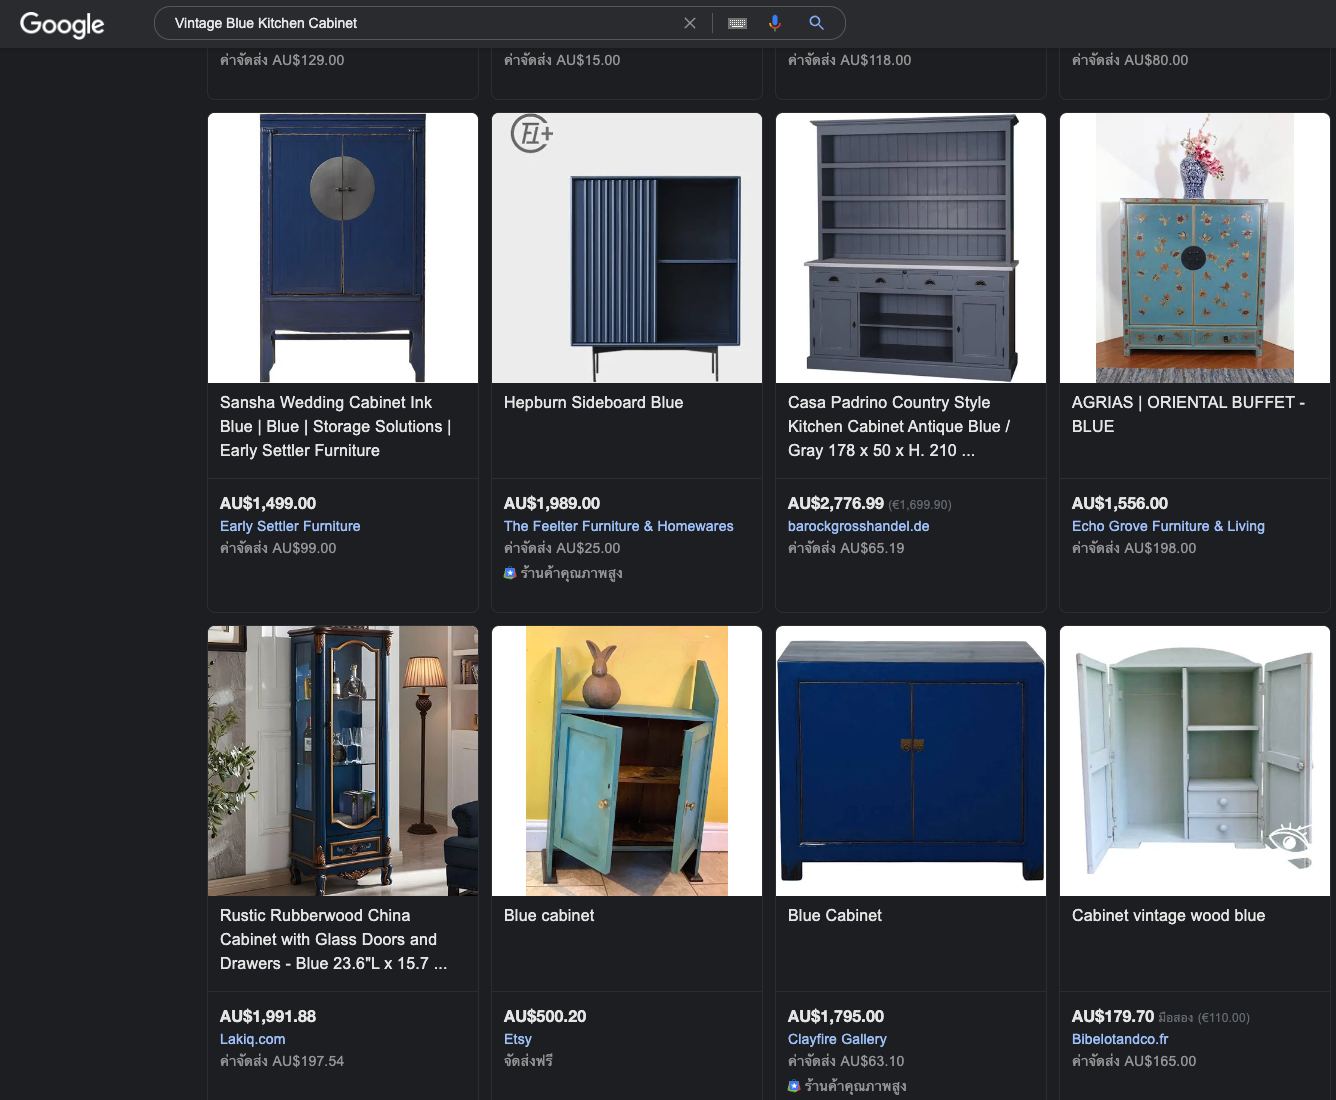

พบว่าเป็นตู้เก็บของ สินค้าขนาดใหญ่ และมีความ Vintage (สไตล์เก่า ๆ เท่ ๆ) อีก จึงไม่แปลกถ้าสินค้านี้จะแพง

**ในที่นี้ ถือว่าเป็น Outlier จริง แต่ไม่ได้เป็นข้อมูลที่ผิด จึงไม่ต้องแก้อะไร**

### มาลอง Clean ข้อมูลด้วย Spark SQL

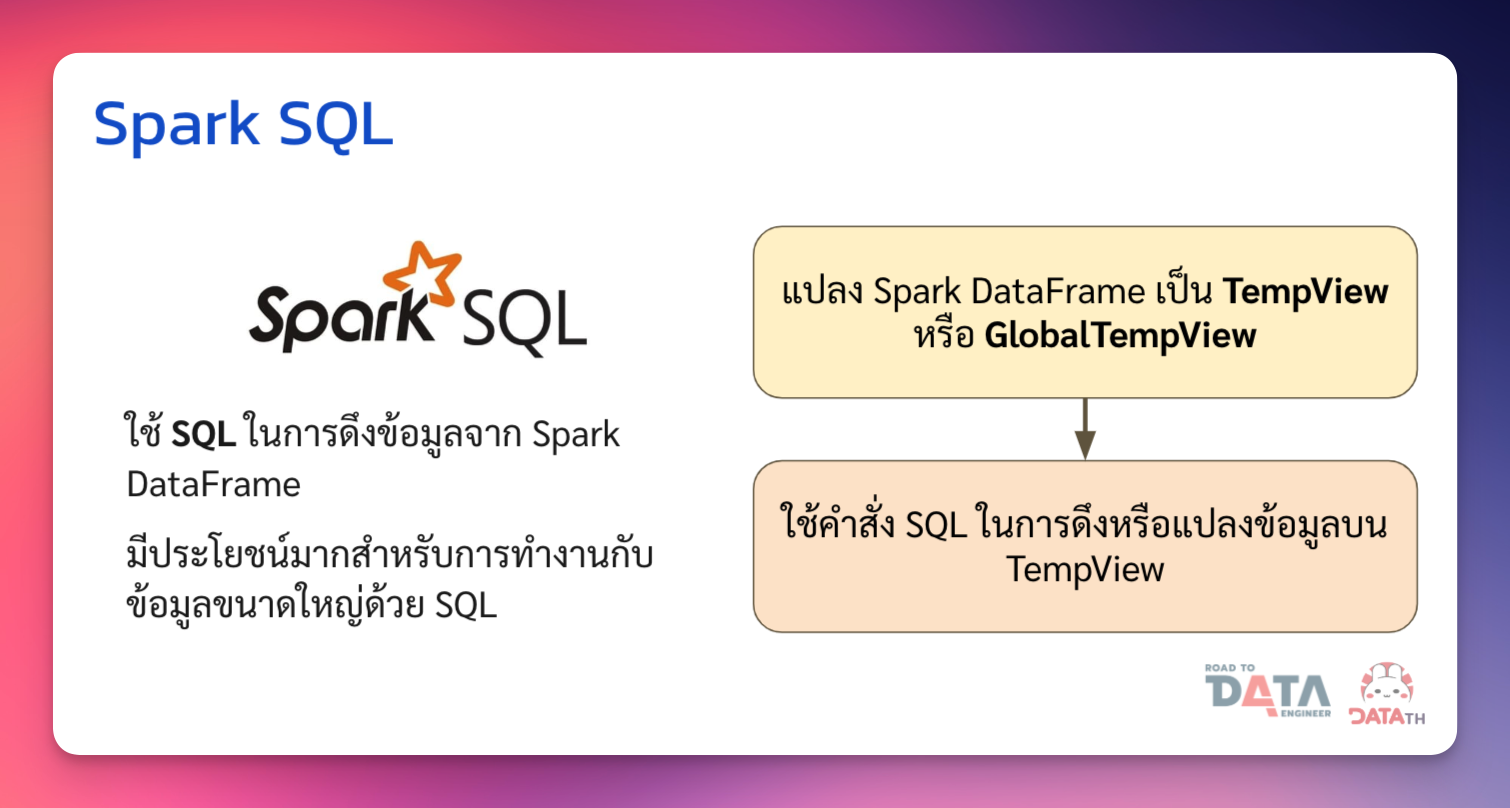

In [ ]:
# แปลงข้อมูลจาก Spark DataFrame ให้เป็น TempView ก่อน
dt.createOrReplaceTempView("data")
dt_sql = spark.sql("SELECT * FROM data")
dt_sql.show()

In [ ]:
# ลองแปลงโค้ดสำหรับลิสต์ชื่อประเทศ Exercise 4 เป็น SQL
dt_sql_country = spark.sql("""
SELECT distinct customer_country
FROM data
ORDER BY customer_country
""")
dt_sql_country.show(100)

In [ ]:
# ลองแปลงโค้ดสำหรับแทนที่ชื่อประเทศ จาก Exercise 4 เป็น SQL
dt_sql_transform = spark.sql("""
SELECT
    transaction_id,
    date,
    product_id,
    price,
    quantity,
    customer_id,
    product_name,
    CASE WHEN customer_country = 'Japane' THEN 'Japan' ELSE customer_country END AS customer_country,
    customer_name,
    total_amount,
    thb_amount
FROM
    data
""")
dt_sql_transform.show()

In [ ]:
# เช็คผลลัพธ์ว่าถูกจริงมั้ย
dt_sql_transform.select("customer_country").distinct().sort("customer_country").show(50)

#### Exercise 7

ทำ Exercise 5 ด้วย SQL แทน Python

In [ ]:
# เช็คว่ามีข้อมูล product_id ที่ไม่เป็นตัวหนังสือหรือตัวเลข 5 หลักมั้ย
# คำใบ้: ใช้คำสั่ง RLIKE ใน SQL เพื่อตรวจเช็ครูปแบบ Regular Expression ได้
dt_sql_check_productid = spark.sql("""
...
""").show()

In [ ]:
# แทนค่า product_id ด้วยตัวหนังสือ 5 ตัวแรก
# คำใบ้: ใช้ CASE WHEN กับคอลัมน์  product_id

dt_sql_productid_clean = spark.sql("""
SELECT
    transaction_id,
    product_id,
    price,
    quantity,
    customer_id,
    product_name,
    customer_country,
    customer_name,
    total_amount,
    thb_amount
FROM
    data
""")
dt_sql_productid_clean.show()

In [ ]:
# เช็คว่าข้อมูลตรงตาม format ที่เราต้องการหรือยัง
# เกร็ดเสริม: ~ = ไม่ใช่ (ทำให้เงื่อนไขที่เขียน กลายเป็นค่าตรงข้าม)
# แทนค่า ... ด้วย regular expression
dt_sql_productid_clean.filter(~dt_sql_productid_clean["product_id"].rlike("...")).show()

# Step 5) Data Export in PySpark

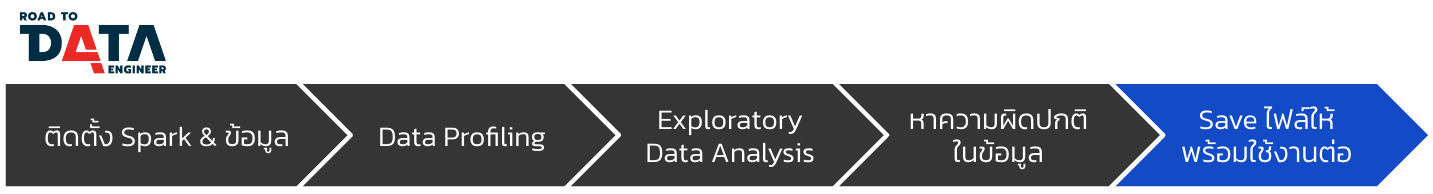

### Parquet Export

บันทึกเป็นไฟล์ Parquet ไฟล์น้ำหนักเบา และมีเก็บประเภทข้อมูลของแต่ละคอลัมน์ให้ด้วย

In [ ]:
dt_clean.write.parquet("cleaned_data_output.parquet")

ทดลองอ่านไฟล์ parquet ที่เพิ่งเซฟไป เพื่อเช็คว่าไฟล์ใช้ได้จริง

In [ ]:
dt2 = spark.read.parquet("cleaned_data_output.parquet")

dt2.show(10)

ทดลองเขียนไฟล์ชื่อเดิม

In [ ]:
dt_clean.write.parquet("cleaned_data_output.parquet")
# dt_clean.write.mode("overwrite").parquet("cleaned_data_output.parquet")

### Bonus 5: CSV Export

ถ้าทำงานกับทีมที่ต้องใช้ตาราง CSV เราสามารถ Export จาก Spark ได้เลย (รัน 3 วินาที)

In [ ]:
# เซฟเป็น CSV
dt_clean.write.csv('cleaned_data.csv', header = True)

ง่ายจังเนอะ >,<

### Bonus 6: Excel Export

แต่ถ้าทีมบอกว่าอยากได้ Excel เราก็มีวิธีใช้ Pandas แฮ่ (แต่เพราะข้อมูลเยอะ จะใช้เวลานานในการรัน ประมาณ 3 นาที)

In [ ]:
dt_clean.toPandas().to_excel("output.xlsx")

----

In [ ]:
print('จบ Workshop 2 แล้วคร้าบ 😍')

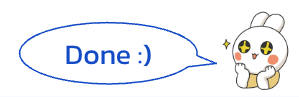